# Project - AllLife Bank Unsupervised Learning

## Description

### Context:
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

**Objective:** To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

**Dataset:**  ALLLife bank

**Data Description:** Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

Apply the concepts and techniques you have learned in the previous weeks and summarize your insights at the end.

### Key Questions:

1. Perform EDA.
2. Apply Clustering Algorithms and mentions how many clusters are formed ?
3. How are these segments different from each other?
4. What are your recommendations to the bank on how to better market to and service these customers?

### Submission Guidelines :

1. There are two parts to the submission: 
    1. A well commented Jupyter notebook [format - .ipynb]
    2. A presentation as you would present to the top management/business leaders [format - .ppt /.pptx] 
2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
4. Submission will not be evaluated if,
    1. it is submitted post-deadline, or,
    2. more than 2 files are submitted
 

Happy Learning!

# Scoring guide (Rubric) - Customer Segmentation

| Criteria                                         | Points                                             |
|:-------------------------------------------------|---------------------------------------------------:|
|**Define the problem and perform an Exploratory Data Analysis** <br/> "- Problem definition, questions to be answered - Data background and contents - Univariate analysis - Bivariate analysis "|8                             |
|**Illustrate the insights based on EDA** <br/> Key meaningful observations on individual variables and the relationship between variables | 7|
|**Data pre-processing** <br/> "Prepare the data for analysis - Feature Engineering - Missing value Treatment - Outlier Treatment - Duplicate observations check and removal if found" | 5 |
|**Applying K-means clustering algorithms** <br/> "Apply K-means - Elbow curve - Silhouette Score - figure out appropriate number of cluster" | 10 |
|**Applying Hierarchical clustering** <br/> "- Apply Hierarchical clustering with different linkage methods - Plot dendrograms for each linkage methods - Choose appropriate number of cluster" | 10 |
|**Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights** <br/> "- Compare clusters obtained from k-means and hierarchical clustering techniques - Perform cluster profiling - Insights about different clusters" | 10 |
|**Actionable Insights & Recommendations** <br/> "- Conclude with the key takeaways for the business - What would your buisness recommendation." | 5 |
|**Notebook - Overall** <br/> "- Structure and flow - Well commented code" | 5 |
| **Total** | **60** |

# Solution
This is a clustering problem and we would like to segment our customers into various groups to understand their behaviour to be able to better market our products and offer more accurate service channels for these customers.


## Environment Setup

We will import all the libraries/packages that we would need for performing EDA, model building and model evaluations in beginning to be able to focus purely on the above listed tasks for the rest of the notebook.

We will need the following:

* Pandas: For working with dataframes.
* Numpy: For working with arrays and collections.
* MatplotLib: for plotting functions.
* Seaborn: for producing high quality visualizations.
* Warnings: To avoid listing warnings in our notebook to keep it tidy
* scipy: for zscore scaling
* Scikit Learn: For using algorithms for AgglomerativeClustering, K-Means Clustering, PCA, measures & profiling

**Note:**
I am using a conda (miniconda) environment on my machine with the following libraries and language versions. The environment.yml file is listed below so that the evaluator can run the notebook in the same environment as I did.

```yml
name: gl-tensorflow
dependencies:
    - python=3.7
    - pip>=20.0
    - jupyter
    - tensorflow=2.0
    - scikit-learn
    - scipy
    - pandas>=1.0.1
    - pandas-datareader
    - matplotlib
    - pillow
    - tqdm
    - requests
    - h5py
    - pyyaml
    - flask
    - boto3
    - xgboost
    - openpyxl
    - scikit-learn-intelex
    - seaborn
    - pip:
        - bayesian-optimization
        - gym
        - kaggle
```

To create this enviroment on your machine follow the below steps:
1. Install miniconds 
2. Create a new yaml file called gl-tensorflow.yml and paste the above yaml content in your file.
3. Install the following command from your terminal

```bash
conda create -n gl-tensorflow --file gl-tensorflow.yml
conda activate gl-tensorflow
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score

# patch sklearn using Intel(R) Extension for Scikit-learn to improve performance
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Data Loading

In the project we have the data available in an Excel Spreadsheet.
Let's import the data to get started.

In [2]:
# load the excel spreadsheet - we only have 1 sheet in the excel spreadsheet - use openpyxl engine.
credit_card_customer_data = pd.read_excel('Credit Card Customer Data.xlsx', sheet_name='Sheet1', engine='openpyxl')
credit_card_customer_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# Task 1: Define the problem and perform an Exploratory Data Analysis

- Problem definition
- questions to be answered
- Data background and contents
- Univariate analysis
- Bivariate analysis

## Problem definition

We are trying to segment the bank customers to be able to:
* Better market our products
* Tailor our services to better meet customer needs based on the segements that they belong to.

## Questions to be answered

As an outcome we should be able to answer to the following questions.
1. Which clustering technique should we use for current problem K-Means vs Hierarchical
1. How many unique segements can we organize our customers into?
2. How reliable is our segmentation - what is the level of homogeneity between each cluster?
3. What are the characteristics of each cluster/segment of customers
4. Based on the characteristics of each group be customers how can we tailor our service offerings

## Data background and contents
The dataset that we have contains the following columns (attributes) related to a customer.
1. Sl_No: This is a running number indicating the row number for each record. Offers no value to our analysis and hence will be dropped.
2. Customer Key: This is a unique identifier of some sort assigned to each customer. We will exclude this column from the clustering analyis however would keep this in the original data frame to be able to see which customers are assigned to which cluster.
3. Avg_Credit_Limit: This is average credit limit of the customer - we don't know the period (days/months/years) over which this value has been averaged out but we can assume that this value is uniformly averaged out for all customers - i.e. the period is same for all obseravtions in the dataset.
4. Total_Credit_Cards: This is total number of credit cards held by the customer.
5. Total_visits_bank: This the total number of times that the customer visted the bank.
6. Total_visits_online: This is total number of times the customer accessed the online banking facilities offered by the bank.
7. Total_calls_made: This is the total number of calls made to the bank call-center by the customer.

## Basic Data Analyis & Cleaning

In order to start with clean and meaningful data we would do the following:
1. Drop the ```Sl_No``` column.
2. Check for missing values (null & na)
3. Check for duplicates

In [3]:
# drop the unwanted Sl_No column
credit_card_customer_data.drop('Sl_No', axis=1, inplace=True)
credit_card_customer_data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [4]:
# check missing values
print(f'Total Null Values:\n{credit_card_customer_data.isnull().sum()}')
print(f'\nTotal Na Values:\n{credit_card_customer_data.isna().sum()}')
# check for duplicates
credit_card_customer_data_grouped = credit_card_customer_data.groupby('Customer Key').count()
credit_card_customer_data_grouped[credit_card_customer_data_grouped.Avg_Credit_Limit>1]

Total Null Values:
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Total Na Values:
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,
37252,2,2,2,2,2
47437,2,2,2,2,2
50706,2,2,2,2,2
96929,2,2,2,2,2
97935,2,2,2,2,2


## Duplicates
we do see duplicates in the dataset - there are 5 customers whose data has been duplicated, let's look at them to see if they are actually duplicates or one customer key has been assigned to different observations.

In [5]:
credit_card_customer_data[(credit_card_customer_data['Customer Key']==37252) 
                          | (credit_card_customer_data['Customer Key']==47437)
                          | (credit_card_customer_data['Customer Key']==50706)
                          | (credit_card_customer_data['Customer Key']==96929)
                          | (credit_card_customer_data['Customer Key']==97935)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
48,37252,6000,4,0,2,8
104,97935,17000,2,1,2,10
332,47437,17000,7,3,1,0
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
411,50706,44000,4,5,0,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


## Duplicates: Conclusion

In the dataset the duplicated Customer Keys that we see can be due to:
1. Sampling the same customer across different date ranges (because except for the ```Customer Key``` all other attributes are different).
2. Data Errors: We might have errors in the data such that two different customers are incorrectly assigned the same ```Customer Key``` (due to Typos or Bug in the Data Extraction etc.)

Irrespective of the reason we will still keep these values as is because they offer data points which indicate an observation of a customer, besides we will not be using the customer key for any of our analysis/profiling purposes.

# EDA

Now that we don't have any missing values or data treatment needs we can start with exploratory data analysis. We can perform univariate and bivariate analysis.

## Univariate analysis.
Most on the numerical values are discrete values (except for Avg_Credit_Limit). Let's visualize them to see what insights can we derive from the data.

<AxesSubplot:xlabel='Total_calls_made', ylabel='count'>

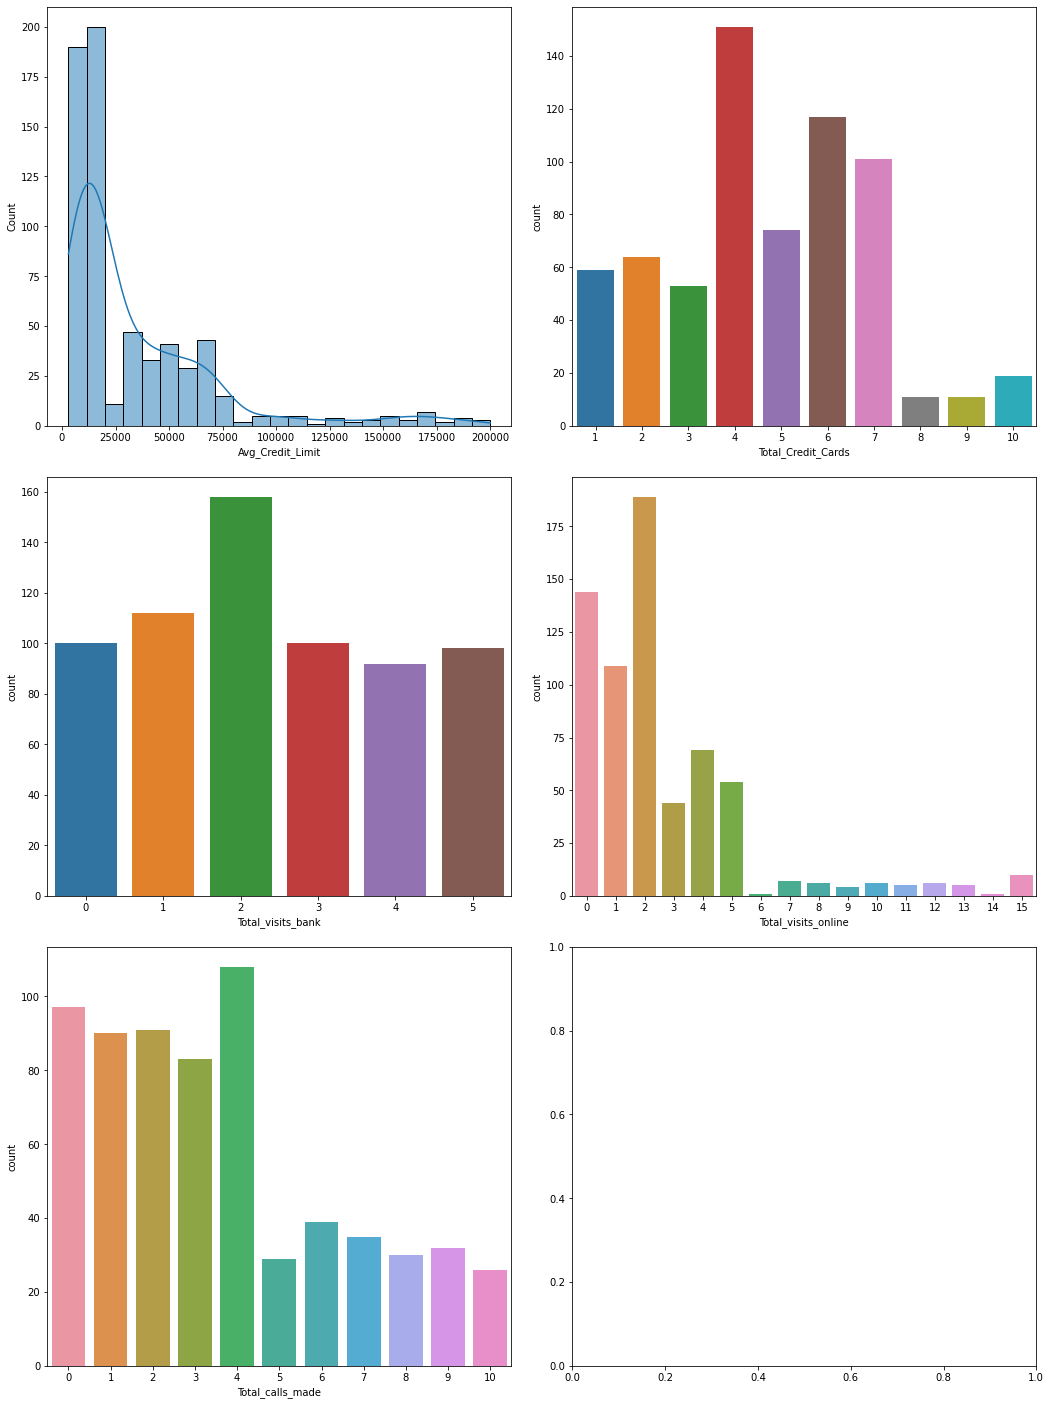

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.histplot(data=credit_card_customer_data, x='Avg_Credit_Limit',ax=axes[0][0], kde=True)
sns.countplot(data=credit_card_customer_data, x='Total_Credit_Cards',ax=axes[0][1])
sns.countplot(data=credit_card_customer_data, x='Total_visits_bank',ax=axes[1][0])
sns.countplot(data=credit_card_customer_data, x='Total_visits_online',ax=axes[1][1])
sns.countplot(data=credit_card_customer_data, x='Total_calls_made',ax=axes[2][0])

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_Credit_Cards'>

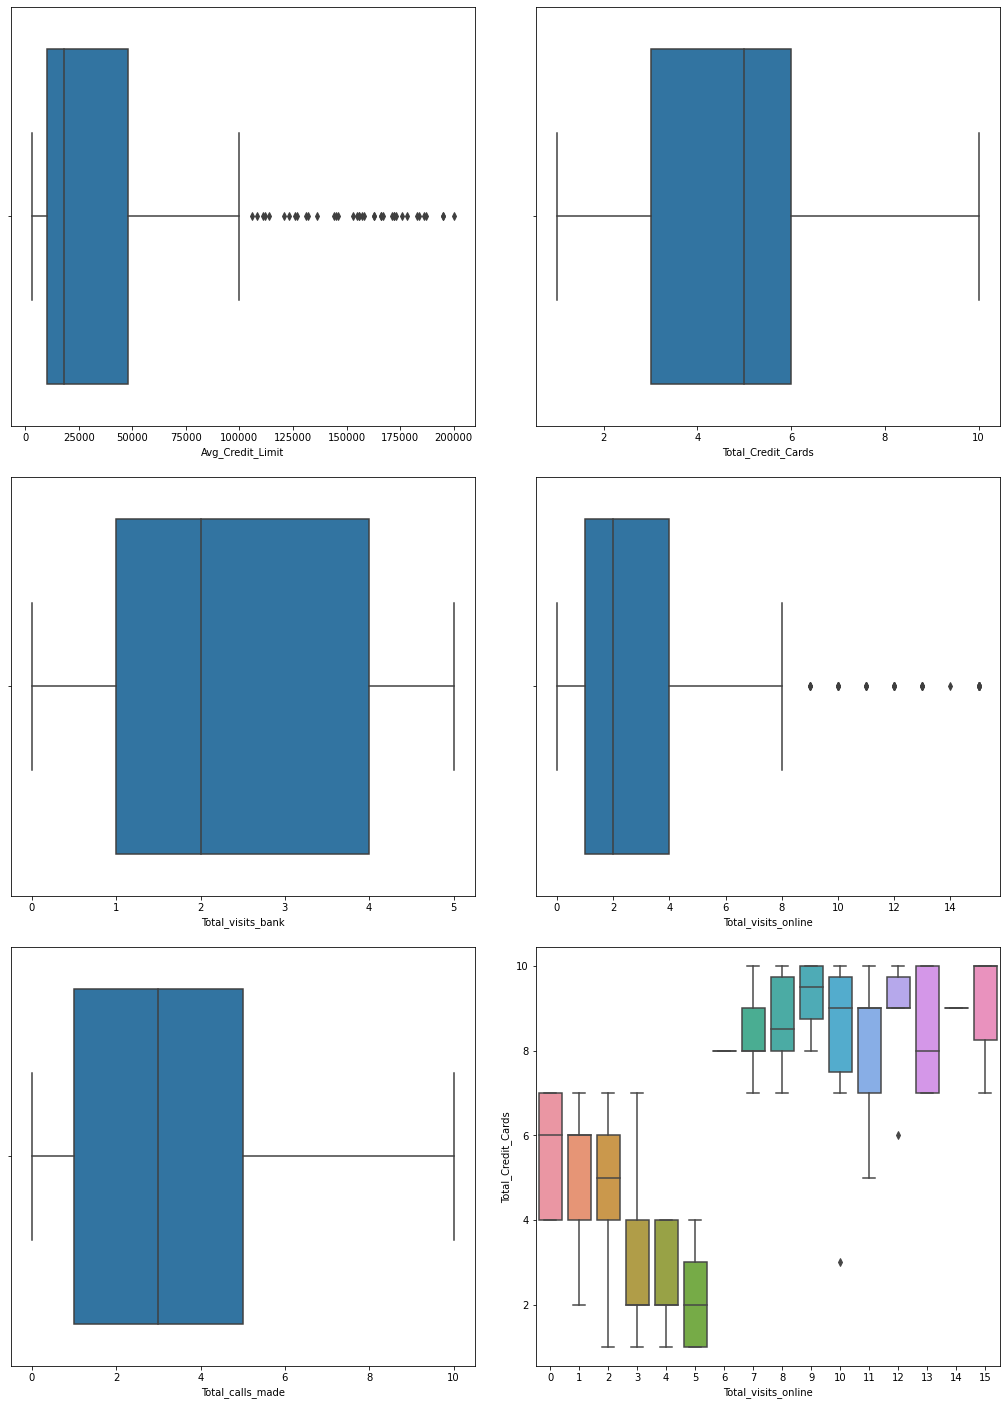

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.boxplot(data=credit_card_customer_data,x='Avg_Credit_Limit',ax=axes[0][0])
sns.boxplot(data=credit_card_customer_data,x='Total_Credit_Cards',ax=axes[0][1])
sns.boxplot(data=credit_card_customer_data,x='Total_visits_bank',ax=axes[1][0])
sns.boxplot(data=credit_card_customer_data,x='Total_visits_online',ax=axes[1][1])
sns.boxplot(data=credit_card_customer_data,x='Total_calls_made',ax=axes[2][0])
sns.boxplot(data=credit_card_customer_data,x='Total_visits_online', y = 'Total_Credit_Cards', ax=axes[2][1])

# Bivariate Analysis

Let's plot the pairs of discrete values (```Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made```) with respect to ```Avg_Credit_Limit``` to see how they are distributed across a 2 dimensional space. We will do a complete pairplot to also understand how each of these attributes affect every other variable later on using the pairplots.

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_calls_made'>

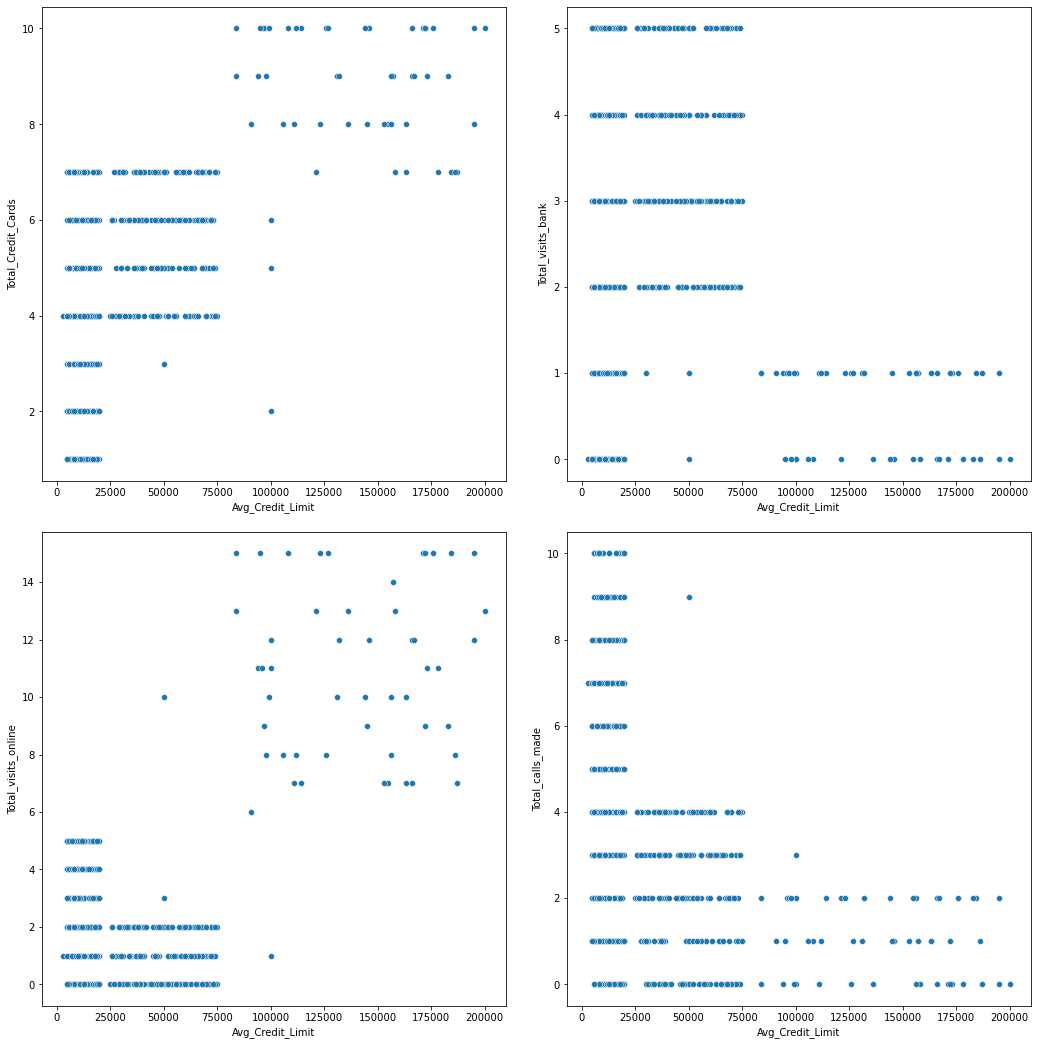

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.scatterplot(data=credit_card_customer_data, x="Avg_Credit_Limit", y="Total_Credit_Cards", ax=axes[0][0])
sns.scatterplot(data=credit_card_customer_data, x="Avg_Credit_Limit", y="Total_visits_bank", ax=axes[0][1])
sns.scatterplot(data=credit_card_customer_data, x="Avg_Credit_Limit", y="Total_visits_online", ax=axes[1][0])
sns.scatterplot(data=credit_card_customer_data, x="Avg_Credit_Limit", y="Total_calls_made", ax=axes[1][1])

# Multivariate & Correlation

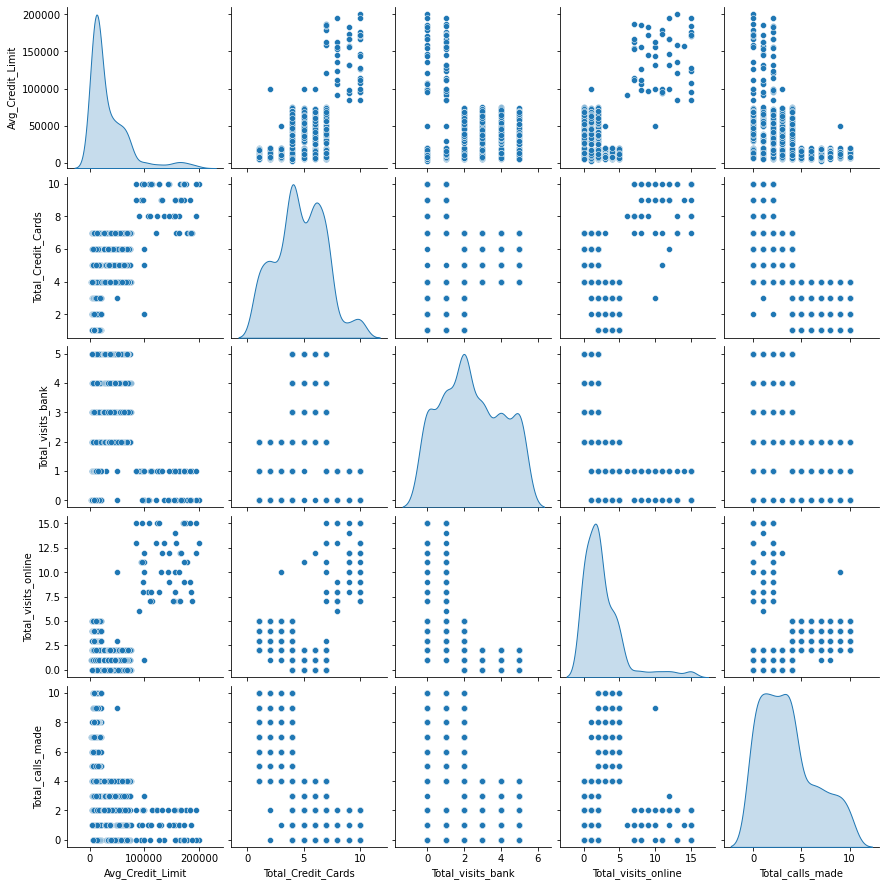

In [9]:
sns.pairplot(data=credit_card_customer_data.iloc[:, 1:],diag_kind='kde')

<AxesSubplot:>

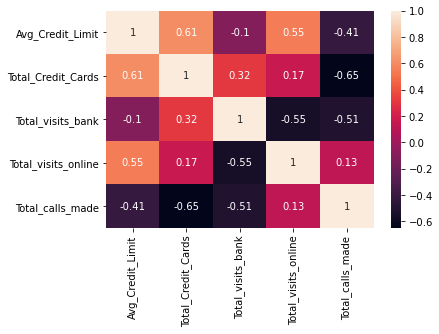

In [10]:
sns.heatmap(credit_card_customer_data.iloc[:, 1:].corr(), annot=True)

# Task 2: Illustrate the insights based on EDA

**Key meaningful observations on individual variables and the relationship between variables.**

## Univariate Analysis Insights

### Distribution
Let's try to see the distributions of individual attributes.

1. Average_Credit_Limit: We have a right skewed distribution with a lot of extreme values or outliers.
2. Total_Credit_Cards: We have majority of customers holding 3-6 cards.
3. Total_visits_bank: The number of observations are almost uniformly distributed in terms of number of visits to the bank, which means we have a healthy distribution of observations with almost enough representation of customers from each segment.
4. Total_visits_online: We do see quite a bit of outliers in terms of online banking users but that is primarily because of low number of observations of customers with 6 or more credit cards who prefer to use mostly online banking features.
5. Total_calls_made: Most of the customers have made between 1-5 calls

## Bi-variate Analysis Insights

1. Customers with Higher Credit Limits tend to visit bank less frequently, and they also tend to have higher nuber of credit cards which is natural because credit limit of each card adds up to take the total value higher and thus pushing the average higher. Such customers also naturally prefer to use online banking features and they tend to make less phone calls (with majority of customers making 2 or less calls)
2. Because we see high correlation (positive or negative) between Credit Limits, Total number of credit cards, Total calls made, total visits online & total bank visits we can logically say that we have a strongly correlated dataset (see correlation values below)
3. Based on the bivariate analysis we can see 2 distinct group of customers such that:
    A. Those who prefer self service options like online banking and they tend to have higher credit facilities (credit limit & number of cards) at their disposal.
    B. Those with lower credit tend to favour traditional contact channels like Phone calls and branch visits.


## Multivariate Analysis

In most of the scatterplots we do see 2 distinct cluster of points which are easily distinguishable without any sophisticated techniques. For specific threshold values or cutoff values which define the line for the segmentation - we would have to apply proper clustering techniques to formalize the segmentation/clustering.

## Correlation Analysis

Most of the data points have a strong correlation to one or more other data points. Below we would try to divide such pairs into three categories:

### Strong (+-0.5 or more)

We have the following pairs with strong correlation:

|Variable 1           | Variable 2                         | Correlation Value   | Type                    |
|:--------------------|:-----------------------------------|--------------------:|:------------------------|
|Total_Credit_Cards   | Avg_Credit_limit                   | 0.61                | Positive                |
|Total_Visits_Online  | Avg_Credit_limit                   | 0.55                | Positive                |
|Total_Visits_Online  | Total_Visits_Bank                  | -0.55               | Negative                |
|Total_calls_made     | Total_Credit_Cards                 | -0.65               | Negative                |
|Total_calls_made     | Total_Visits_Bank                  | -0.51               | Negative                |

### Mild Correlation (+-0.3 or more but less than +-0.5)
Apart from the above there is a weak correlation between the below listed attributes:

|Variable 1           | Variable 2                         | Correlation Value   | Type                    |
|:--------------------|:-----------------------------------|--------------------:|:------------------------|
|Total_calls_made     | Avg_Credit_limit                   | -0.41               | Negative                |
|Total_visits_bank    | Total_Credit_Cards                 | 0.32                | Positive                |

### Weak Correlation (less than +-0.3)

The below listed attributes are weakly correlated.

|Variable 1           | Variable 2                         | Correlation Value   | Type                    |
|:--------------------|:-----------------------------------|--------------------:|:------------------------|
|Total_visits_bank    | Avg_Credit_limit                   | -0.1                | Negative                |
|Total_Visits_Online  | Total_Credit_Cards                 | 0.17                | Positive                |
|Total_Visits_Online  | Total_calls_made                   | 0.13                | Positive                |

# Task 3: Data pre-processing
For our clustering analysis we are supposed to perform the following next steps.

## Step 1: Prepare the data for analysis
We will extract the data into a separate dataframe containing the below listed attributes.

1. Avg_Credit_limit
2. Total_Credit_Cards
3. Total_visits_bank
4. Total_visits_online
5. Total_calls_made

## Step 2: Feature Engineering
We have a very compact datasets in terms of numbers of features so no extra feature engineering techniques like dimensionality reduction etc. are needed but because both of the clustering techniques we are going to use are sensitive to magnitude of values we will scale the data that we prepared in the prevvious step using ```zscore``` function.

## Step 3: Missing value Treatment
There are no missing values in the data.

## Step 4: Outlier Treatment
We do have outliers in ```Avg_Credit_limit``` and ```Total_visits_online``` however these encode very important customer attributes that are very crucial to assigning customers to a segment. I am going to keep the outliers in the dataset and not remove them.

## Duplicate observations check and removal if found
We don't have absolute duplicates (where all attributes are duplicated) but we do have the same ```Customer Key``` being repeated across observations. This could be same customer data from 2 different points in time or an error in the data extraction such that the ```Customer Key``` values got messed up somehow. In any case we would not want loose these observations and I believe that they represent unique customers (either at different points in time or different persons altogether depending on the reasons cited above).

## Step 1: Prepare the data for analysis

In [11]:
## Step 1: Prepare the data for analysis
credit_card_customer_attr = credit_card_customer_data[['Avg_Credit_Limit',
                                                       'Total_Credit_Cards',
                                                       'Total_visits_bank',
                                                       'Total_visits_online',
                                                       'Total_calls_made']]
credit_card_customer_attr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## Step 2: Feature Engineering

In [12]:
# step 2: scale the values using zscore
credit_card_customer_scaled = credit_card_customer_attr.apply(zscore)
credit_card_customer_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


## Step 3: Missing value Treatment
There are no missing values in the data.

## Step 4: Outlier Treatment
No action needed.

## Step 5: Duplicate observations check and removal if found
No action needed.

# Task 4: Applying K-means clustering algorithms

## Step 1: Apply K-means
We will apply k-means with a varying value of k, we will use a range of 1-10 to collect sum of squared errors as a measure.

## Step 2: Elbow curve
We will plot the SSE on to a graph to visualize it and choose the optimal value of *k* using the **Elbow Method**

## Step 3: Silhouette Score
We will cross validate the value of *k* received in the previous step with **Silhouette Score** metrics as well (will plot the *Silhouette Score* curve for the range of k in 2-10 - because the Silhouette Score requires you to have more than 1 cluster)

## Step 4: figure out appropriate number of cluster
Will chose the optimal number for k using combination of SSE & Silhouette Score.

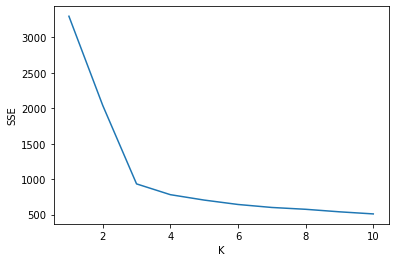

In [13]:
# experiment with values of k starting from 1 to 11
k_range=range(1,11)
# store the sum of squared errors/distances for each value of k
sse = []
for k in k_range:
    k_means = KMeans(n_clusters=k,random_state=1)
    k_means.fit(credit_card_customer_scaled)
    sse.append(k_means.inertia_)
# visualize the SSE with respect to k
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

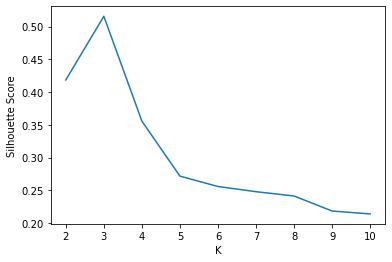

In [14]:
# experiment with values of k starting from 1 to 11
k_range=range(2,11)
# store the sum of silhouette scores for each value of k
silhouettes = []
for k in k_range:
    k_means = KMeans(n_clusters=k,random_state=1)
    k_means.fit(credit_card_customer_scaled)
    clusters=k_means.predict(credit_card_customer_scaled)
    silhouette = silhouette_score(credit_card_customer_scaled, clusters)
    silhouettes.append(silhouette)
# plot the scores against each value of 1 - higher value is better.
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.plot(k_range, silhouettes)

# Task 4: Applying K-means clustering algorithms - Optimal Value of K
Based on the above analysis we can conclude that the best values of SSE & Silhouette Score are obtained when the value of k=3.

Let's build a KMeans Model using k=3 and try to profile the customers.

In [15]:
# let's create a model with k=3
k_means_optimal = KMeans(n_clusters=3,random_state=1)
k_means_optimal.fit(credit_card_customer_scaled)
# get clusters ffor data
clusters_optimal=k_means_optimal.predict(credit_card_customer_scaled)

# create copt to keep the original data as it is
credit_card_customer_data_clustered = credit_card_customer_data.copy()
credit_card_customer_scaled_clustered = credit_card_customer_scaled.copy()

# add labels/clusters to the copies for analysis
credit_card_customer_data_clustered['Group'] = clusters_optimal
credit_card_customer_scaled_clustered['Group'] = clusters_optimal
credit_card_customer_data_clustered.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2


<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_calls_made'>

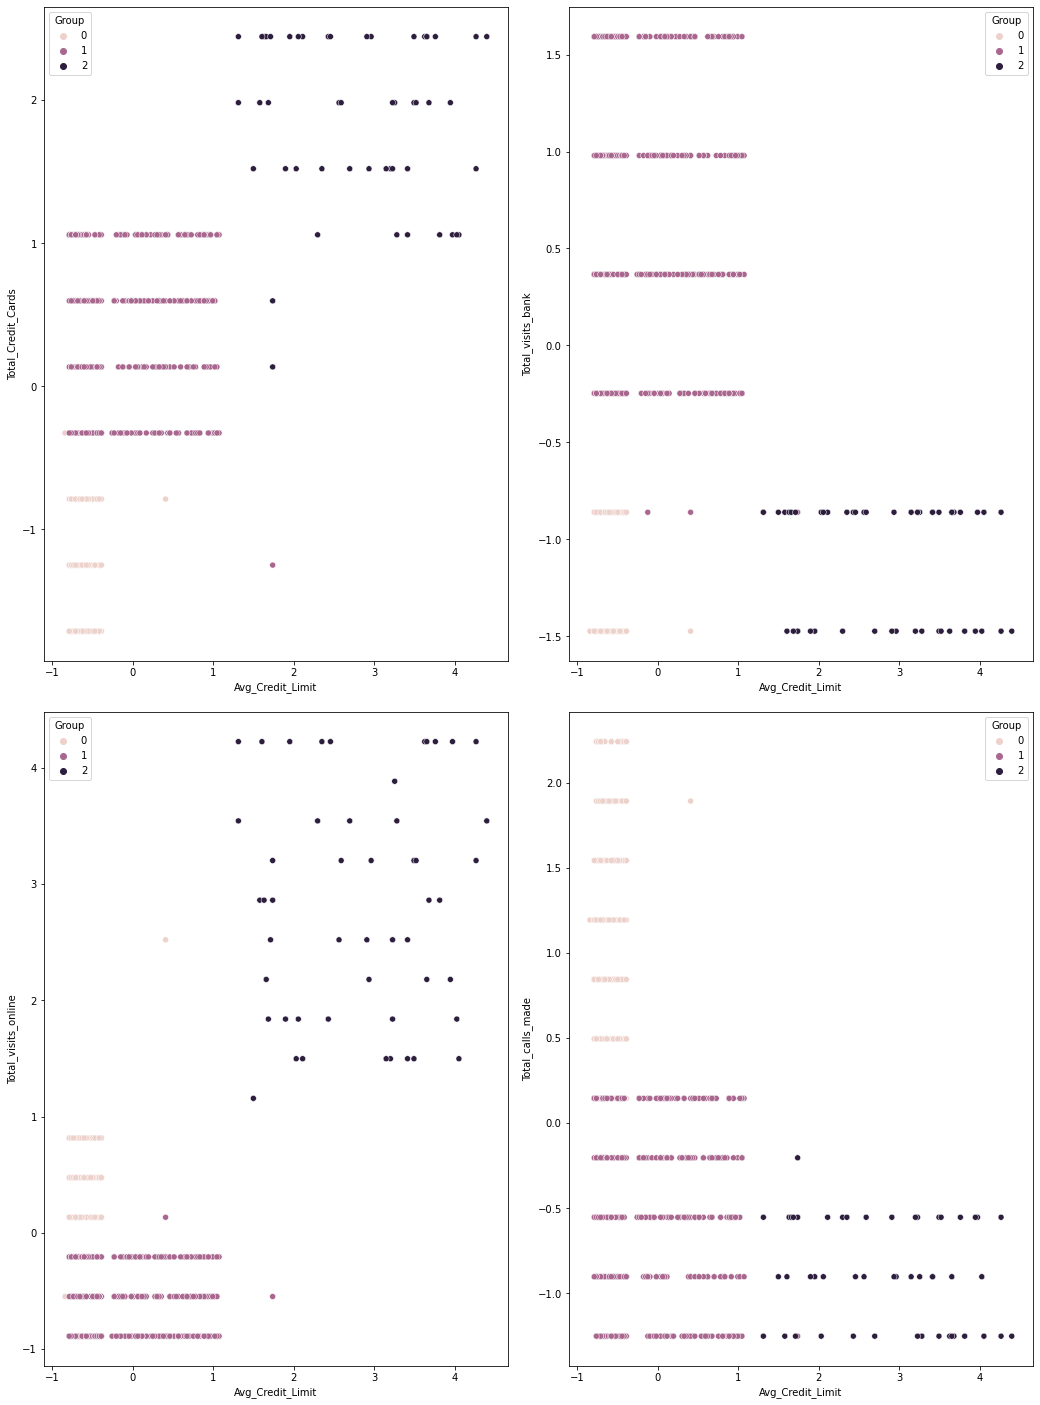

In [16]:
# plot the clusters on scaled data copy
fig, axes = plt.subplots(2, 2, figsize=(15, 20), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.scatterplot(data=credit_card_customer_scaled_clustered, x="Avg_Credit_Limit", y="Total_Credit_Cards", hue='Group', ax=axes[0][0])
sns.scatterplot(data=credit_card_customer_scaled_clustered, x="Avg_Credit_Limit", y="Total_visits_bank", hue='Group', ax=axes[0][1])
sns.scatterplot(data=credit_card_customer_scaled_clustered, x="Avg_Credit_Limit", y="Total_visits_online", hue='Group', ax=axes[1][0])
sns.scatterplot(data=credit_card_customer_scaled_clustered, x="Avg_Credit_Limit", y="Total_calls_made", hue='Group', ax=axes[1][1])

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_calls_made'>

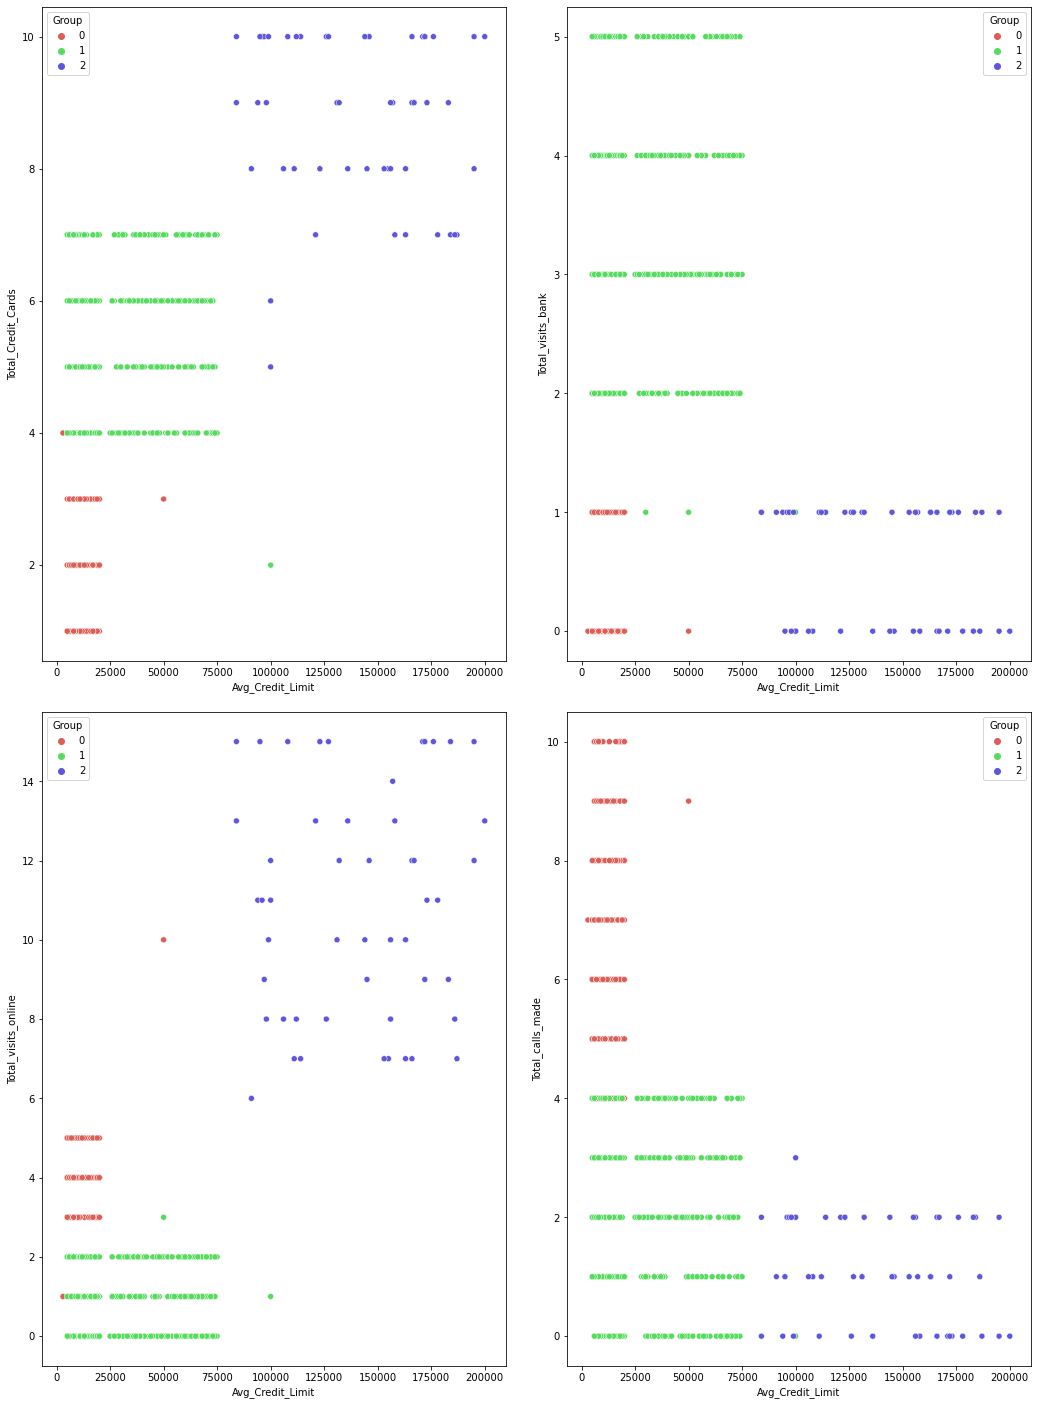

In [17]:
# plot the clusters on original data copy
fig, axes = plt.subplots(2, 2, figsize=(15, 20), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.scatterplot(data=credit_card_customer_data_clustered, x="Avg_Credit_Limit", y="Total_Credit_Cards", hue='Group', ax=axes[0][0],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_clustered, x="Avg_Credit_Limit", y="Total_visits_bank", hue='Group', ax=axes[0][1],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_clustered, x="Avg_Credit_Limit", y="Total_visits_online", hue='Group', ax=axes[1][0],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_clustered, x="Avg_Credit_Limit", y="Total_calls_made", hue='Group', ax=axes[1][1],palette=sns.color_palette("hls",3))

In [18]:
# let's check the average values per group
credit_card_customer_data_clustered.groupby('Group').mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,,
0,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


In [19]:
# Let's check the most common values per group
credit_card_customer_data_clustered.groupby('Group').agg(pd.Series.mode)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,8000,2,0,4,6
1,8000,6,3,0,3
2,"[84000, 100000, 156000, 163000, 166000, 172000...",10,1,15,2


# Customer Cluster Profiles
Based on the above visualizations & aggregates we can say the following about customers in different clusters.

|Cluster | Credit Limit     | Credit Cards             | Bank Visits         | Online Visits      | Calls Made      |
|--------|------------------|--------------------------|---------------------|--------------------|-----------------|
| 0      | Lowest Credit    | Lowest Number of Cards   | Occassional Visits  | Occassional Visits | Frequent calls  |
| 1      | Medium Credit    | Medium Number of Cards   | Frequent Visits     | Rare Visits        | Occasional calls|
| 2      | Highest Credit   | Highest Number of Cards  | Rare Visits         | Frequent Visits    | Rare calls      |

Based on this we can say that:
1. Customers in cluster 0 are probably low income customers who have low credit limits and mostly interact with us using call center connects.
2. Customers in cluster 1 are medium credit limit customers who prefer to walk in for their requests/queries.
3. Customers in cluster 2 are the most sophisticated customers who rarely call or visit the bank in person and mostly conduct their banking related tasks online. These customers are probably upper income group customers and have a higher standard of living.

# Task 5: Applying Hierarchical clustering

## Step 1: Apply Hierarchical clustering with different linkage methods
We will use the following linkage methods to create Hierarchical cluster models.
1. average
2. complete
3. ward

## Step 2: Plot dendrograms for each linkage methods
we will plot dandogram for each linkage method to be able to see linkages and where the clusters combine.

## Step 3: Choose appropriate number of cluster
Based on the insights using dandograms from different linkage methods we will decide the optimal number of clusters.

In [20]:
# create 3 models with different linkage methods
agg_model_average = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
agg_model_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
agg_model_ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [21]:
# fit all 3 models with scaled data
agg_model_average.fit(credit_card_customer_scaled)
agg_model_complete.fit(credit_card_customer_scaled)
agg_model_ward.fit(credit_card_customer_scaled)

# copy original & scaled datasets for creating labeled data frames for analysis
credit_card_customer_scaled_agg_average = credit_card_customer_scaled.copy()
credit_card_customer_scaled_agg_complete = credit_card_customer_scaled.copy()
credit_card_customer_scaled_agg_ward = credit_card_customer_scaled.copy()
credit_card_customer_data_agg_average = credit_card_customer_data.copy()
credit_card_customer_data_agg_complete = credit_card_customer_data.copy()
credit_card_customer_data_agg_ward = credit_card_customer_data.copy()

# add labels to the dataframes
credit_card_customer_scaled_agg_average['Group'] = agg_model_average.labels_
credit_card_customer_scaled_agg_complete['Group'] = agg_model_complete.labels_
credit_card_customer_scaled_agg_ward['Group'] = agg_model_ward.labels_
credit_card_customer_data_agg_average['Group'] = agg_model_average.labels_
credit_card_customer_data_agg_complete['Group'] = agg_model_complete.labels_
credit_card_customer_data_agg_ward['Group'] = agg_model_ward.labels_

Cophenetic Score (Average Linkage): 0.8977080867389372


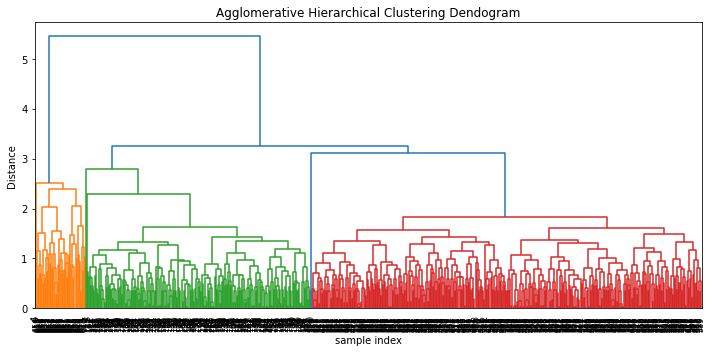

In [22]:
# average linkage cophenetic scores - closer it is to 1, the better is the clustering
Z_Average = linkage(credit_card_customer_scaled, metric='euclidean', method='average')
c_average, coph_dists_average = cophenet(Z_Average , pdist(credit_card_customer_scaled))
print(f'Cophenetic Score (Average Linkage): {c_average}')
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_Average, leaf_rotation=90.,color_threshold = 3, leaf_font_size=8. )
plt.tight_layout()

Cophenetic Score (Average Linkage): 0.8599730607972423


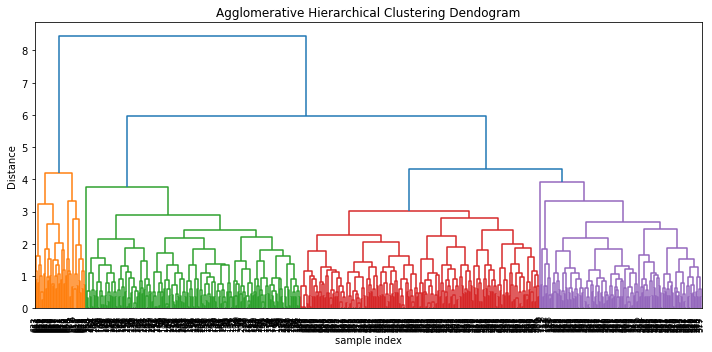

In [23]:
# average linkage cophenetic scores - closer it is to 1, the better is the clustering
Z_Complete = linkage(credit_card_customer_scaled, metric='euclidean', method='complete')
c_complete, coph_dists_complete = cophenet(Z_Complete , pdist(credit_card_customer_scaled))
print(f'Cophenetic Score (Average Linkage): {c_complete}')
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_Complete, leaf_rotation=90.,color_threshold = 4.2, leaf_font_size=8. )
plt.tight_layout()

Cophenetic Score (Average Linkage): 0.7415156284827493


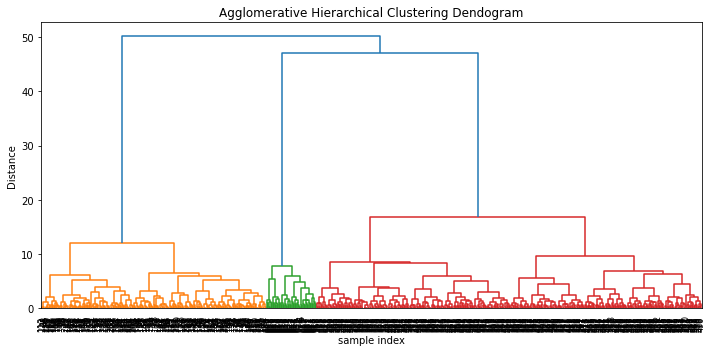

In [24]:
# average linkage cophenetic scores - closer it is to 1, the better is the clustering
Z_Ward = linkage(credit_card_customer_scaled, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_Ward , pdist(credit_card_customer_scaled))
print(f'Cophenetic Score (Average Linkage): {c_ward}')
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_Ward, leaf_rotation=90.,color_threshold = 20, leaf_font_size=8. )
plt.tight_layout()

# Task 5: Applying Hierarchical clustering: Optimal Parameters

Based on the above analysis we can conclude that we get the best score using ```average``` linkage method (0.8977080867389372) - we can also see that in most of the dandograms we see 3 clear clusters emerging at almost equal hieght.

So it is recommended that we use the following parameters.
1. Number of clusters: 3
2. Linkage Method: 'average'

# Task 6: Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights

## Compare clusters obtained from k-means and hierarchical clustering techniques
We will visualize the clusters received from both K-Means and Agglomerative Clustering side by side with for each feature with respect to Average Credit Limit.

## Perform cluster profiling
We will profile the clusters received from each model and see how they compare.

## Insights about different clusters
Finally we will extract actionable insights about each cluster by defining customers profile.

Graphs on the left side are from the K-Means model and those on the right side are from AgglomerativeClustering (with Average Linkage)


<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_calls_made'>

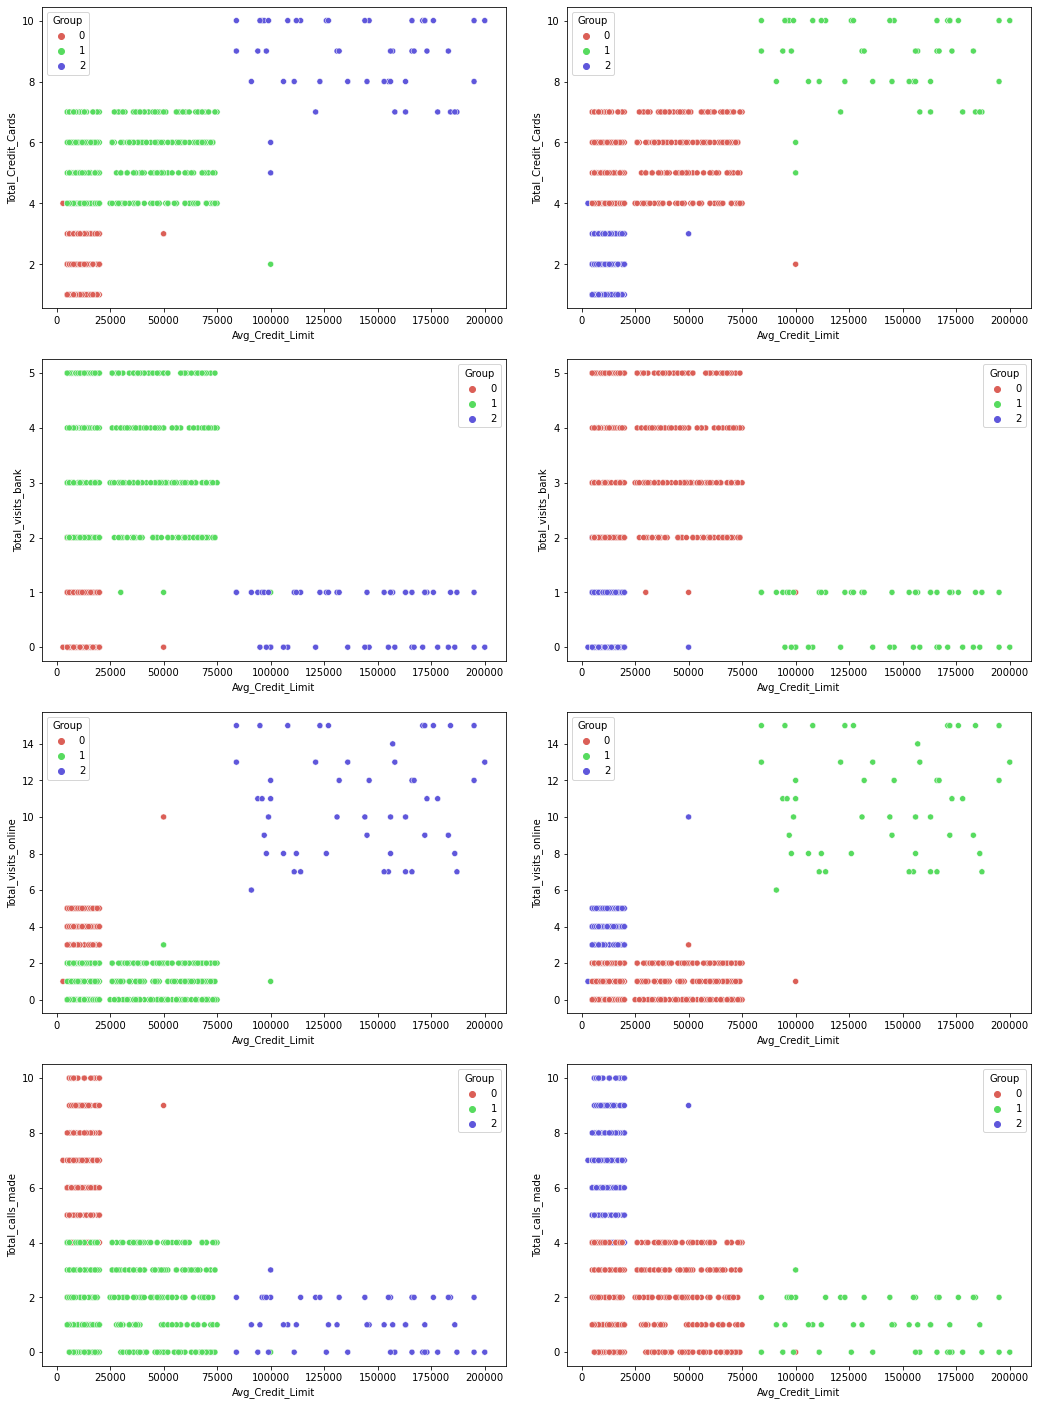

In [25]:
print('Graphs on the left side are from the K-Means model and those on the right side are from AgglomerativeClustering (with Average Linkage)')
# Plot the clusters side by side for comparision.
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.scatterplot(data=credit_card_customer_data_clustered, x="Avg_Credit_Limit", y="Total_Credit_Cards", hue='Group', ax=axes[0][0],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_agg_average, x="Avg_Credit_Limit", y="Total_Credit_Cards", hue='Group', ax=axes[0][1],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_clustered, x="Avg_Credit_Limit", y="Total_visits_bank", hue='Group', ax=axes[1][0],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_agg_average, x="Avg_Credit_Limit", y="Total_visits_bank", hue='Group', ax=axes[1][1],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_clustered, x="Avg_Credit_Limit", y="Total_visits_online", hue='Group', ax=axes[2][0],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_agg_average, x="Avg_Credit_Limit", y="Total_visits_online", hue='Group', ax=axes[2][1],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_clustered, x="Avg_Credit_Limit", y="Total_calls_made", hue='Group', ax=axes[3][0],palette=sns.color_palette("hls",3))
sns.scatterplot(data=credit_card_customer_data_agg_average, x="Avg_Credit_Limit", y="Total_calls_made", hue='Group', ax=axes[3][1],palette=sns.color_palette("hls",3))

In [26]:
# K-Means Clusters: let's get the mean values assiciated with each cluster
credit_card_customer_data_clustered.groupby('Group').mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,,
0,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


In [27]:
# Heirarchical Clusters: let's get the mean values assiciated with each cluster
credit_card_customer_data_agg_average.groupby('Group').mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,,
0,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408


In [28]:
# K-Means Clusters: what are the most common values
credit_card_customer_data_clustered.groupby('Group').agg(pd.Series.mode)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,8000,2,0,4,6
1,8000,6,3,0,3
2,"[84000, 100000, 156000, 163000, 166000, 172000...",10,1,15,2


In [29]:
# Heirarchical Clusters: what are the most common values
credit_card_customer_data_agg_average.groupby('Group').agg(pd.Series.mode)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,8000,6,3,0,3
1,"[84000, 100000, 156000, 163000, 166000, 172000...",10,1,15,2
2,8000,2,0,4,6


# Interesting Observations:

- Clusters assigned by Agglomerative Clustering (with complete linkage) are quite similar to what K-Means assigned to most data points.

# Customer Cluster Profiles using K-Means Clusters & Agglomerative Clusters
Based on the above visualizations & aggregates we can say the following about customers in different clusters.

|Cluster (KMeans/Agglomerative) | Credit Limit     | Credit Cards             | Bank Visits         | Online Visits      | Calls Made      |
|--------|------------------|--------------------------|---------------------|--------------------|-----------------|
| 0/2    | Lowest Credit    | Lowest Number of Cards   | Occassional Visits  | Occassional Visits | Frequent calls  |
| 1/0    | Medium Credit    | Medium Number of Cards   | Frequent Visits     | Rare Visits        | Occasional calls|
| 2/1    | Highest Credit   | Highest Number of Cards  | Rare Visits         | Frequent Visits    | Rare calls      |


# Insights about different clusters
Based on this we can say that:
1. Customers in cluster 0/2 are probably low income customers who have low credit limits and mostly interact with us using call center connects.
2. Customers in cluster 1/0 are medium credit limit customers who prefer to walk in for their requests/queries.
3. Customers in cluster 2/1 are the most sophisticated customers who rarely call or visit the bank in person and mostly conduct their banking related tasks online. These customers are probably upper income group customers and have a higher standard of living.

# Task 7: Actionable Insights & Recommendations

## Key takeaways for the business & Recommendations
1. We have 3 prominant customer segments and we can combine this data with the spending habits of customers belonging to each segement and run targeted campaigns through respective contact points to increase customer spending. For example the the lower credit limit segment (0/2) contacts us mostly through phone so we can have marketing campaigns advertized on the IVR/Customer Care Agents etc. The same way medium credit limit segment (1/0) can be targeted using in-branch banners & branch staff
2. We can run customer awareness campaigns to try to get most of our customers (especially low/medium credit segments) to use internet banking - this would reduce our costs on manpower and improve overall bottomline. Also this would reduce the service times for customers and result in better customer satisfaction overall.
3. We can run promotional campaigns on various e-commerce websites targeted at high credit limit segement (2/1) to increase customer spending.

# Task 8: Notebook - Overall

## Structure and flow
I have followed a very clear and step by step process while creating the notebook. I have also documented every step in great details. The notebook is organized in the same sequence as indicated in the Scoring Guide (Rubric).

## Well commented code
There are comments on every code cell documenting what is being done.